In [1]:
# Aleksandra Spiecha
# Exercise 2

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import pystan

dictionary = dict(y = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], N = 17)

with open('bern_1.stan', 'r') as file:
    code = file.read()
print(code)

data {
   int<lower=0> N;
   int<lower=0,upper=1> y[N];
 }
 parameters {
   real<lower=0,upper=1> theta;
 }
 model {
   theta ~ beta(1,1);  // uniform prior on interval 0,1
   y ~ bernoulli(theta);
 }


In [2]:
model = pystan.StanModel(model_code = code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_eb22098ef445f0bb01fb43a6ecfa9a5e NOW.


In [4]:
# Sampling the model
fit = model.sampling(dictionary, iter=1000, chains=1, seed=1)

In [5]:
# Handle parameters and extract
parameters = fit.extract()
theta = parameters['theta']
percentiles = (0.05, 0.5, 0.95) 
summary = fit.summary(probs = percentiles)

dataframe = pd.DataFrame(summary['summary'], 
                    columns=summary['summary_colnames'], 
                    index=summary['summary_rownames'])

mean = dataframe['mean']['theta']
median = dataframe['50%']['theta']
percentile5 = dataframe['5%']['theta']
percentile95 = dataframe['95%']['theta']

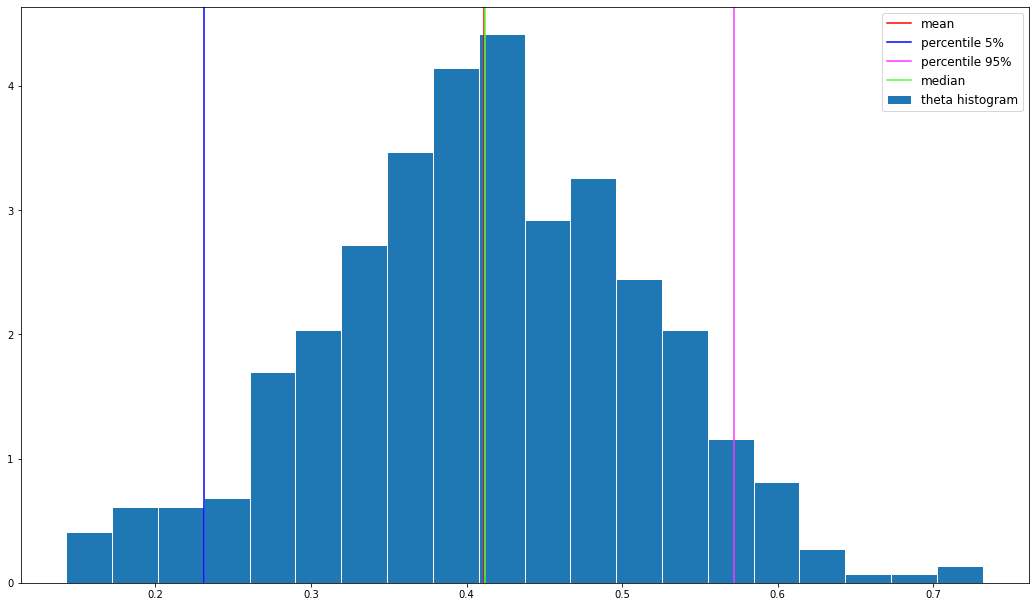

In [6]:
fig = plt.figure(figsize = (14, 8));

ax = fig.add_axes([0, 0, 1, 1])

ax.hist(theta, bins = 20, edgecolor = '#FFFFFF', density = True);

ax.axvline(x = mean, ymin = 0, ymax = 4, color = '#FF0000')
ax.axvline(x = percentile5, ymin = 0, ymax = 4, color = '#0000FF')
ax.axvline(x = percentile95, ymin = 0, ymax = 4, color = '#FF33FF')
ax.axvline(x = median, ymin = 0, ymax = 4, color = '#55FF33') 

ax.legend(['mean', 'percentile 5%', 'percentile 95%', 'median', 'theta histogram'], fontsize = 'large');